In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mplot
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from matplotlib.colors import ListedColormap
import os
import subprocess
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score,  precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
 
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns

import random
 


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils import plot_model
 
from tensorflow.keras import layers, Input
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.metrics import AUC, Precision, Recall, F1Score
from tensorflow.keras.utils import plot_model

import pickle 

import shap
import lime
from lime import lime_tabular
import random

import dalex as dx 


from tabulate import tabulate 


# Define custom metrics
recall = Recall()
precision = Precision()
f1_score = F1Score()
auc = AUC()






In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mplot
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from matplotlib.colors import ListedColormap
import os
import subprocess
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score,  precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
 
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns

import random
 


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist 
 
from tensorflow.keras import layers, Input
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.metrics import AUC, Precision, Recall, F1Score
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K



import pickle 

import shap
import lime
from lime import lime_tabular
import random

import dalex as dx 


from tabulate import tabulate 


# Define custom metrics
recall = Recall()
precision = Precision()
f1_score = F1Score()
auc = AUC()






In [2]:
dataSetIndex = 4
needToMakePictureOfTrees = 0
''' ---------------------------------------------------------- '''
dataSetFilePath = ""
dataSetName = ""
dataSetResultDirectory = "./"

if(dataSetIndex == 0):
    dataSetFilePath = "./heartDisease/0_statLog_dataSet.csv"
    dataSetName = "SateLog_DataSet"
elif (dataSetIndex == 1):
    dataSetFilePath = "./heartDisease/1_heart_statlog_cleveland_hungary_final.csv"
    dataSetName = "ALL_StateLog_CleveLand_Hungary"
elif (dataSetIndex == 2):
    dataSetFilePath = "./heartDisease/2_cleveland.csv"
    dataSetName = "Cleveland"
elif (dataSetIndex == 3):
    dataSetFilePath = "./heartDisease/3_framingham.csv"
    dataSetName = "framingham"
elif (dataSetIndex == 4):
    dataSetFilePath = "./heartDisease/4_CardiacPrediction.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 5):
    dataSetFilePath = "./heartDisease/5_CardiacPredictionLessDimensions.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 6):
    dataSetFilePath = "./heartDisease/6_CardiacPredictionFewDimensions.xlsx"
    dataSetName = "CardiacPrediction"
else:
    dataSetFilePath = ""
    dataSetName = ""

if(dataSetIndex==4 or dataSetIndex==5 or dataSetIndex==6):
    #fileData = pd.read_excel(dataSetFilePath, sheet_name='CoroHeartDis')
    fileData = pd.read_excel(dataSetFilePath)
else:
    fileData = pd.read_csv(dataSetFilePath)

print("Shape of fileData: {}".format(fileData.shape))
print("Column Headings: {}".format(fileData.__dataframe__().column_names()))
print("Number of Records: {}".format(fileData.__dataframe__().num_rows()))


missingValues = fileData.isnull().any().sum()
print(f"\nNumber of Missing Values: {missingValues}")

num_rows_before = fileData.shape[0]
# Remove duplicate records based on all columns
fileData.drop_duplicates(inplace=True)
# Check the number of rows after removing duplicates
num_rows_after = fileData.shape[0]
# Print the number of duplicate records removed
num_duplicates_removed = num_rows_before - num_rows_after
print(f"Number of duplicate records removed: {num_duplicates_removed}")
 
 # Preprocess Steps from the ChatGPT
# 1. Handling Missing Values:
fileData = fileData.dropna()
print("Shape of fileData: {}".format(fileData.shape))              
#fileData.replace({'?': np.nan}).dropna().astype(float)
#fileData = fileData.fillna(0) 

fileData = fileData.fillna(0) 

print("Shape of fileData End: {}".format(fileData.shape))



finalResultTable = [ ['Index', 'Method', 'Accuracy %','Recall %','Precision %','F1 Score','AUC'], ]  

X = fileData.drop(fileData.__dataframe__().column_names()[-1], axis=1)  # Features
Y = fileData[fileData.__dataframe__().column_names()[-1]]  # Labels

columns = fileData.__dataframe__().column_names() 
totalRecords = (fileData.__dataframe__().num_rows())

print("\n")
print("columns of x:: {} \n\n and features of X: {}".format(len(X.columns), X.columns))

dataSetResultDirectory = "./"
dataSetResultDirectory += ("DatasetResults_MLP_with_AttentionLayers_Visualized_" + dataSetName)
dataSetResultDirectory += "/"
if not os.path.isdir(dataSetResultDirectory):
    os.makedirs(dataSetResultDirectory)

dataSetName += "_{}".format(fileData.shape)



Shape of fileData: (37079, 51)
Column Headings: Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')
Number of Records: 37079

Number of Missing Values: 0
Number o

Target Column Name: CoronaryHeartDisease


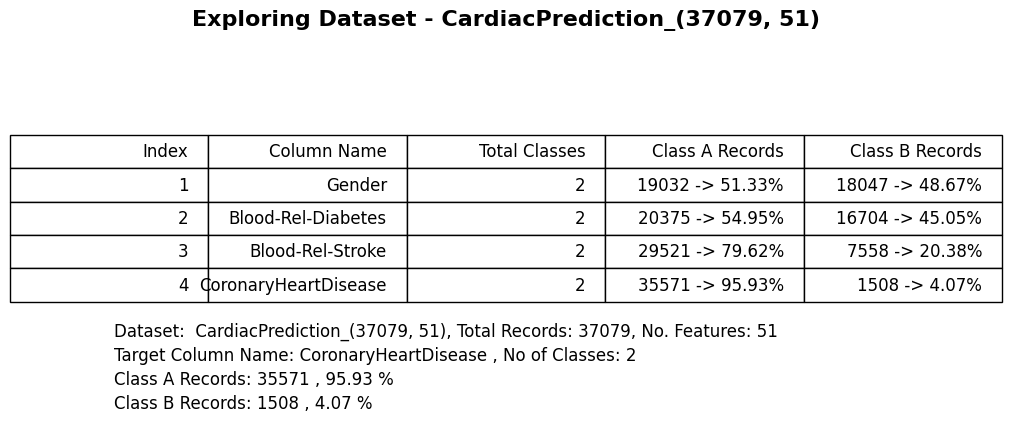

In [3]:
columns = fileData.__dataframe__().column_names() 
totalRecords = (fileData.__dataframe__().num_rows())
columnsForGraph = []
columnsForGraph.clear()
tableDataRow = []
for column in columns:
    singleColumnCount = fileData[column].value_counts()
    if(len(singleColumnCount) < 3):
        #print('Column Name:{} -> total records:{}'.format(column, totalRecords ) )
        #print('Number of classes:', len(singleColumnCount))
        #print('Class distribution:')
        #print(singleColumnCount)
        #print("np Array: {}".format(np.array(singleColumnCount)))
        #print("index: 0: {} -> {} %".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100))
        #print("index: 1: {} -> {} %".format(np.array(singleColumnCount)[1], ( np.array(singleColumnCount)[1] /totalRecords) * 100))  
        #print('---------------------------------------------------------------')
        columnsForGraph.append(column)
 

tableDataRow = [
    ['Index', 'Column Name', 'Total Classes','Class A Records','Class B Records'],
    
]

indexx = 1
for column in columnsForGraph:
    singleColumnCount = fileData[column].value_counts()
    singleRowInTable = [] 
    singleRowInTable.append(indexx)
    singleRowInTable.append(column)
    singleRowInTable.append(len(singleColumnCount))
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[1], (np.array(singleColumnCount)[1] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    indexx += 1
    tableDataRow.append(singleRowInTable) 

# Create the figure and axes
fig, ax = mplot.subplots() 
table = mplot.table(cellText=tableDataRow, loc='center') 

table.auto_set_font_size(False)
table.set_fontsize(12) 
table.scale(2.0, 2.0) 
print("Target Column Name: {}".format(columns[-1]))


dataSetString = "Dataset:  {}, Total Records: {}, No. Features: {}".format(dataSetName, totalRecords, fileData.__dataframe__().num_columns())
target ="Target Column Name: {} , No of Classes: {}".format(columns[-1], len(fileData[columns[-1]].value_counts()))
distributionOfTargetClassA ="Class A Records: {} , {:.2f} %".format(np.array(fileData[columns[-1]].value_counts())[0], (np.array(fileData[columns[-1]].value_counts())[0] /totalRecords) * 100)
distributionOfTargetClassB ="Class B Records: {} , {:.2f} %".format(np.array(fileData[columns[-1]].value_counts())[1], (np.array(fileData[columns[-1]].value_counts())[1] /totalRecords) * 100)

fig.text(-0.1, +0.25,  dataSetString, horizontalalignment='left', wrap=False , fontsize=12 )  
fig.text(-0.1, +0.20,  target, horizontalalignment='left', wrap=False  , fontsize=12 )   
fig.text(-0.1, 0.15,  distributionOfTargetClassA, horizontalalignment='left', wrap=False , fontsize=12  )   
fig.text(-0.1, 0.10,  distributionOfTargetClassB, horizontalalignment='left', wrap=False  , fontsize=12 )   
 
 
mplot.axis('off')
mplot.title(f'Exploring Dataset - {dataSetName}' ,fontsize=16, fontweight='bold') 

picturePath = "{}1.DataSet_analysis_{}.png".format(dataSetResultDirectory, dataSetName)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.savefig('DataSet_analysis.png', dpi=300)
mplot.show()
mplot.close()
 

In [4]:
print("Shape of fileData: {} , target Len:{}".format(fileData.shape, len(Y)))
print("X: {} , Y:{}".format(X.shape, Y.shape))
#print("\n\nX: head:: \n{}".format(X.head()))
#print("\n\nY: head::\n {}".format(Y.head()))

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
 

print("Target Column Name:: {} \n".format(fileData.__dataframe__().column_names()[-1]))


rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

'''
# Undersample the majority class
X_train, y_train = rus.fit_resample(X_train, y_train)
X_test, y_test = rus.fit_resample(X_test, y_test)
'''

# Oversample the minority class using SMOTE
X_train, y_train = smote.fit_resample(X_train, y_train)
#X_test, y_test = rus.fit_resample(X_test, y_test)
X_test, y_test = smote.fit_resample(X_test, y_test) 


scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



print("\n X Train: Shape:: {}".format(X_train.shape))
print(" X Test: Shape:: {}".format(X_test.shape))  
 
 
positiveClass =  0
negativeClass = 0
for i in y_train:
    if(i == 0):
        negativeClass += 1
    if(i == 1):
        positiveClass += 1
print("Train DataSet Positive Class Records:: {}".format(positiveClass)) 
print("Train DataSet Negative Class Records:: {}".format(negativeClass)) 
print("Train DataSet Total Records:: {}".format(positiveClass + negativeClass)) 

print("\n\n") 


positiveClass =  0
negativeClass = 0
for i in y_test:
    if(i == 0):
        negativeClass += 1
    if(i == 1):
        positiveClass += 1
print("Test DataSet Positive Class Records:: {}".format(positiveClass)) 
print("Test DataSet Negative Class Records:: {}".format(negativeClass)) 
print("Test DataSet Total Records:: {}".format(positiveClass + negativeClass)) 



Shape of fileData: (37079, 51) , target Len:37079
X: (37079, 50) , Y:(37079,)
Target Column Name:: CoronaryHeartDisease 



Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  File "c:\Users\Mubashir Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



 X Train: Shape:: (56914, 50)
 X Test: Shape:: (14228, 50)
Train DataSet Positive Class Records:: 28457
Train DataSet Negative Class Records:: 28457
Train DataSet Total Records:: 56914



Test DataSet Positive Class Records:: 7114
Test DataSet Negative Class Records:: 7114
Test DataSet Total Records:: 14228


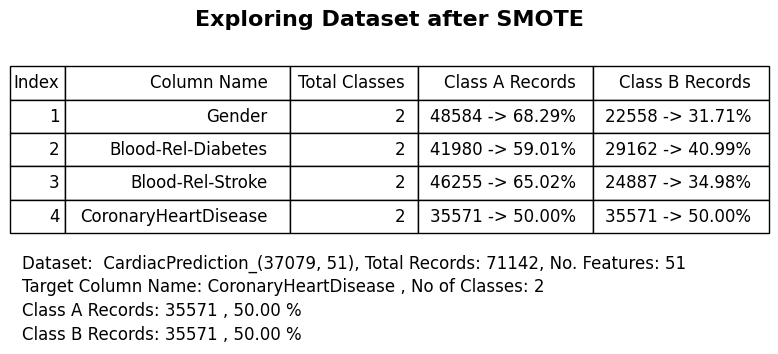

In [5]:

columnsForGraph = []
columnsForGraph.clear()
tableDataRow = []


# Concatenate feature and target data for both training and testing sets
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)

columns = df_combined.__dataframe__().column_names() 
totalRecords = (df_combined.__dataframe__().num_rows())
for column in columns:
    singleColumnCount = df_combined[column].value_counts()
    if(len(singleColumnCount) < 3):
        #print('Column Name:{} -> total records:{}'.format(column, totalRecords ) )
        #print('Number of classes:', len(singleColumnCount))
        #print('Class distribution:')
        #print(singleColumnCount)
        #print("np Array: {}".format(np.array(singleColumnCount)))
        #print("index: 0: {} -> {} %".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100))
        #print("index: 1: {} -> {} %".format(np.array(singleColumnCount)[1], ( np.array(singleColumnCount)[1] /totalRecords) * 100))  
        #print('---------------------------------------------------------------')
        columnsForGraph.append(column)
 
tableDataRow = [ ['Index', 'Column Name', 'Total Classes','Class A Records','Class B Records'], ]

indexx = 1
for column in columnsForGraph:
    singleColumnCount = df_combined[column].value_counts()
    singleRowInTable = [] 
    singleRowInTable.append(indexx)
    singleRowInTable.append(column)
    singleRowInTable.append(len(singleColumnCount))
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[1], (np.array(singleColumnCount)[1] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    indexx += 1
    tableDataRow.append(singleRowInTable) 

 
# Determine the number of rows in the table (excluding the header)
num_rows = len(tableDataRow) + 1
# Calculate the desired figure size based on the number of rows
fig_width = 6  # Set the desired width of the figure
fig_height = num_rows * 0.5  # Adjust the scaling factor to control the height

fig, ax = mplot.subplots(figsize=(fig_width, fig_height)) 
table = mplot.table(cellText=tableDataRow, loc='center') 

table.auto_set_column_width(col=list(range(len(tableDataRow[0]))))

table.auto_set_font_size(False)
table.set_fontsize(12) 
table.scale(2.0, 2.0) 

dataSetString = "Dataset:  {}, Total Records: {}, No. Features: {}".format(dataSetName, totalRecords, df_combined.__dataframe__().num_columns())
target ="Target Column Name: {} , No of Classes: {}".format(columns[-1], len(df_combined[columns[-1]].value_counts()))
distributionOfTargetClassA ="Class A Records: {} , {:.2f} %".format(np.array(df_combined[columns[-1]].value_counts())[0], (np.array(df_combined[columns[-1]].value_counts())[0] /totalRecords) * 100)
distributionOfTargetClassB ="Class B Records: {} , {:.2f} %".format(np.array(df_combined[columns[-1]].value_counts())[1], (np.array(df_combined[columns[-1]].value_counts())[1] /totalRecords) * 100)

fig.text(-0.1, +0.10,  dataSetString, horizontalalignment='left', wrap=False , fontsize=12 )  
fig.text(-0.1, +0.02,  target, horizontalalignment='left', wrap=False  , fontsize=12 )   
fig.text(-0.1, -0.06,  distributionOfTargetClassA, horizontalalignment='left', wrap=False , fontsize=12  )   
fig.text(-0.1, -0.14,  distributionOfTargetClassB, horizontalalignment='left', wrap=False  , fontsize=12 )   

remarks = "You need to distribute the target class in equal number of records in training-set."
#fig.text(-0.2, -0.15,  remarks, horizontalalignment='left', wrap=True ,fontsize=12, fontweight='bold' )   
 
mplot.axis('off')
mplot.title(f'Exploring Dataset after SMOTE' ,fontsize=16, fontweight='bold') 
picturePath = "{}02.DataSet_analysis_After_dataAugmentation_{}.png".format(dataSetResultDirectory, dataSetName)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.savefig(picturePath,  dpi=300 )
mplot.show()
mplot.close()

In [6]:
def makeCorrelationPic(correlationMatrix, numberOfTopFeatures, targetColumnName):     
    correlation_values = correlationMatrix.abs()
    sorted_correlation = correlation_values.unstack().sort_values(ascending=False)
    sorted_correlation = sorted_correlation[sorted_correlation != 1.0]

    num_features = numberOfTopFeatures  # Number of top features to display
    top_features = sorted_correlation.head(num_features)
    print("Top", num_features, "features based on correlation:")
    print(top_features)
 
    top_features = correlationMatrix.abs().nlargest(numberOfTopFeatures, targetColumnName)[targetColumnName].index
    top_correlation_matrix = correlationMatrix.loc[top_features, top_features]

    mplot.figure(figsize=(10, 8))
    sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm')
    # Set the title of the plot
    mplot.title('Correlation Heatmap ({})'.format(dataSetName))
    
    picturePath = "Correlation_Matrix_DateSetName_{}.png".format(dataSetName)
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    mplot.show()
    mplot.close()

def makeConfusionMatrixPic(method, dataSet, classifierObj , X_test, y_test, predicted_Y):
    display = ConfusionMatrixDisplay.from_estimator(classifierObj, X_test, y_test, display_labels=['Healthy', "Heart Disease"], cmap=mplot.cm.Blues) #, normalize="true"
    display.ax_.set_title("Confusion Matrix ({} Model)".format(method))
    ax_.set_xlabel('\nPredicted Values')
    ax_.set_ylabel('Actual Values ')


    accuracyString ="Accuracy {}: {:.2f}".format(method, accuracy_score(y_test, predicted_Y)*100.0 ) 
    recallString =  'Recall {}: {:.2f}'.format(method, recall_score(y_test, predicted_Y) * 100.0)
    precisionString = 'Precision {}: {:.2f}'.format(method, precision_score(y_test, predicted_Y) * 100.0) 
    dataSetString = "Dataset: {}".format(dataSet)

    
    if(classifierObj.n_features_in_ > 10):
        featureListString = 'Total Features: {}'.format(classifierObj.n_features_in_) 
    else:
        featureListString = 'Features: {}'.format(classifierObj.feature_names_in_) 
    
    display.figure_.text(0.010, -0.05,  accuracyString, horizontalalignment='left', wrap=False )  
    display.figure_.text(0.010, -0.09,  recallString, horizontalalignment='left', wrap=False )      
    display.figure_.text(0.010, -0.13,  precisionString, horizontalalignment='left', wrap=False ) 
    display.figure_.text(0.010, -0.17,  dataSetString, horizontalalignment='left', wrap=False ) 
    display.figure_.text(0.010, -0.28,  featureListString, horizontalalignment='left', wrap=False ) 
 
    picturePath = "{}Confusion_Matrix_{}_{}.png".format(dataSetResultDirectory, method, dataSetName)
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    #print("{} Confusion Matrix saved:: path: {}".format(method, picturePath))
    #os.startfile(picturePath)
    mplot.show()
    mplot.close()


In [7]:
X_train_normalized = tf.keras.utils.normalize(X_train, axis=1)
X_test_normalized = tf.keras.utils.normalize(X_test, axis=1)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test) 
# Our vectorized labels

X_train_f32 = np.asarray(X_train).astype(np.float32)  #.astype('float32').reshape((-1,1))
X_test_f32 = np.asarray(X_test).astype(np.float32)

#y_train_scaler = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test_scaler = np.asarray(y_test).astype('float32').reshape((-1,1))

 

# Separate features and target variable
features = X_train_scaler # data.iloc[:, :-1]
target = np.asarray(y_train).astype('float64').reshape((-1,1))  #data['CoronaryHeartDisease']
 
 

print("X_train shape: {}   and dType: {}".format(X_train.shape, len(X_train.columns)))
print("X_train_scaler shape: {}   and dType: {}".format(X_train_scaler.shape, X_train_scaler.dtype))
print("X_test_scaler shape: {}   and dType: {}".format(X_test_scaler.shape, X_test_scaler.dtype)) 


print("y_train shape: {}   and dType: {}".format(y_train.shape, y_train.dtype))  
print("y_test_scaler shape: {}   and dType: {}".format(y_test_scaler.shape, y_test_scaler.dtype))  


print("features shape: {}   and dType: {}".format(features.shape, features.dtype))
print("target shape: {}   and dType: {}".format(target.shape, target.dtype)) 

X_train shape: (56914, 50)   and dType: 50
X_train_scaler shape: (56914, 50)   and dType: float64
X_test_scaler shape: (14228, 50)   and dType: float64
y_train shape: (56914,)   and dType: int64
y_test_scaler shape: (14228, 1)   and dType: float32
features shape: (56914, 50)   and dType: float64
target shape: (56914, 1)   and dType: float64


In [8]:
tf.keras.backend.clear_session()
# Define the attention layer
print("Number of Node: {}".format(features.shape[1]//2))
print("Number 2 of Node: {}".format(features.shape[1]//1.5))


class AttentionLayer(tf.keras.layers.Layer):
    def call(self, inputs, **kwargs):
        q, v = inputs
        attention = tf.keras.layers.Attention()([q, v])
        return attention

# Build the model
input_layer = Input(shape=(features.shape[1],))

# Traditional neural network part
x = layers.Dense(features.shape[1]*2, activation='relu')(input_layer)
x = layers.Dense(features.shape[1], activation='relu')(x) 
x = layers.Dense(features.shape[1], activation='relu')(x) 
x = layers.BatchNormalization()(x)
 
attention = AttentionLayer()([x, x]) 
x = layers.Concatenate()([x, attention])
x = layers.Dense(features.shape[1], activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(features.shape[1]//2, activation='relu')(x)
# Output layer
output_layer = layers.Dense(1, activation='sigmoid')(x)



model = tf.keras.Model(inputs=input_layer, outputs=output_layer) 
optimizer = AdamW(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', recall, precision, f1_score, auc])

# Display the model summary
#model.summary() 


Number of Node: 25
Number 2 of Node: 33.0


In [9]:
numberOfEpochs = 40
batchSizeOfTraining = 25
history = 0

history = model.fit(features, target, epochs=numberOfEpochs, batch_size=batchSizeOfTraining)

model2 = model




Epoch 1/40


2277/2277 [==============================] - 17s 6ms/step - loss: 0.2698 - accuracy: 0.8877 - recall: 0.9078 - precision: 0.8728 - f1_score: 0.6667 - auc: 0.9544
Epoch 2/40
2277/2277 [==============================] - 12s 5ms/step - loss: 0.2058 - accuracy: 0.9199 - recall: 0.9390 - precision: 0.9044 - f1_score: 0.6667 - auc: 0.9725
Epoch 3/40
2277/2277 [==============================] - 12s 5ms/step - loss: 0.1765 - accuracy: 0.9334 - recall: 0.9489 - precision: 0.9204 - f1_score: 0.6667 - auc: 0.9791
Epoch 4/40
2277/2277 [==============================] - 12s 5ms/step - loss: 0.1525 - accuracy: 0.9445 - recall: 0.9578 - precision: 0.9330 - f1_score: 0.6667 - auc: 0.9838
Epoch 5/40
2277/2277 [==============================] - 13s 6ms/step - loss: 0.1335 - accuracy: 0.9525 - recall: 0.9629 - precision: 0.9432 - f1_score: 0.6667 - auc: 0.9872
Epoch 6/40
2277/2277 [==============================] - 14s 6ms/step - loss: 0.1197 - accuracy: 0.9578 - recall: 0.9680 - precision: 

In [10]:

y_test_float64 = np.asarray(y_test).astype('float64').reshape((-1,1))  #data['CoronaryHeartDisease']
model_history = model2.fit(X_test_scaler, y_test_float64, epochs=2, batch_size=batchSizeOfTraining)

Epoch 1/2
570/570 [==============================] - 2s 3ms/step - loss: 0.2637 - accuracy: 0.9022 - recall: 0.9159 - precision: 0.8914 - f1_score: 0.6667 - auc: 0.9563
Epoch 2/2
570/570 [==============================] - 2s 3ms/step - loss: 0.1512 - accuracy: 0.9487 - recall: 0.9625 - precision: 0.9367 - f1_score: 0.6667 - auc: 0.9829


In [11]:
# Evaluate the model using the evaluate method
y_test_float64 = np.asarray(y_test).astype('float64').reshape((-1,1))  #data['CoronaryHeartDisease']

loss, accuracy, recall_value, precision_value, f1_score_value, auc_value = model2.evaluate(X_test_scaler, y_test_float64)

# Print the results
print('Test loss: {}'.format(loss*100))
print('Test accuracy: {}'.format(accuracy*100))
print('Test recall: {}'.format(recall_value*100))
print('Test precision: {}'.format(precision_value*100))
print('Test F1 score: {}'.format(f1_score_value*100))
print('Test AUC: {}'.format(auc_value*100))


picturePath = "{}Model_Evaluation_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, "Testing_Accuracy", dataSetName, numberOfEpochs)


445/445 [==============================] - 2s 2ms/step - loss: 0.1032 - accuracy: 0.9669 - recall: 0.9875 - precision: 0.9484 - f1_score: 0.6668 - auc: 0.9925
Test loss: 10.323837399482727
Test accuracy: 96.68962359428406
Test recall: 98.74894618988037
Test precision: 94.8427140712738
Test F1 score: [66.68229]
Test AUC: 99.25256967544556


445/445 [==============================] - 1s 2ms/step
MLP with Attention layer Confusion Matrix saved:: path: ./DatasetResults_MLP_with_AttentionLayers_Visualized_CardiacPrediction/Model_Evaluation_MLP with Attention layer_CardiacPrediction_(37079, 51)_Epoch_40.png


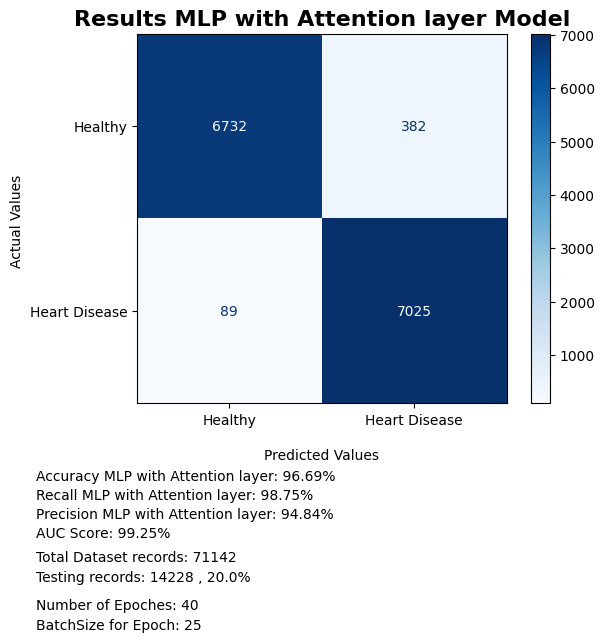

In [12]:
threshold = 0.5  # Adjust the threshold as needed
binary_predictions = (model2.predict(X_test_scaler) > threshold).astype(int)

cm = confusion_matrix(y_test_float64, binary_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Heart Disease'])

display.plot(cmap=plt.cm.Blues, values_format=".4g") 


method = "MLP with Attention layer"
display.ax_.set_title("Results {} Model".format(method),fontsize=16, fontweight='bold')
display.ax_.set_xlabel('\nPredicted Values')
display.ax_.set_ylabel('Actual Values ')

accuracyString ="Accuracy {}: {:.2f}%".format(method, accuracy*100.0 ) 
recallString =  'Recall {}: {:.2f}%'.format(method, recall_value* 100.0)
precisionString = 'Precision {}: {:.2f}%'.format(method, precision_value * 100.0) 
#f1String = "F1 Score: {:.2f}".format(f1_score_value * 100.0)
featureListString = "AUC Score: {:.2f}%".format(auc_value * 100.0)
totaldataSetString = "Total Dataset records: {}".format((len(features)+len(X_test_scaler)))
testingdataSetString = "Testing records: {} , {:.1f}%".format(len(X_test_scaler), ( ( len(X_test_scaler) / (len(features)+len(X_test_scaler)) )*100.0  ))
numberOfEpochsString = "Number of Epoches: {}".format(numberOfEpochs)
batchSizeOfTrainingString = "BatchSize for Epoch: {}".format(batchSizeOfTraining)

display.figure_.text(0.010, -0.05,  accuracyString, horizontalalignment='left', wrap=False )  
display.figure_.text(0.010, -0.09,  recallString, horizontalalignment='left', wrap=False )      
display.figure_.text(0.010, -0.13,  precisionString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.17,  featureListString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.22,  totaldataSetString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.26,  testingdataSetString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.32,  numberOfEpochsString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.36,  batchSizeOfTrainingString, horizontalalignment='left', wrap=False ) 
 
picturePath = "{}Model_Evaluation_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, method, dataSetName, numberOfEpochs)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
print("{} Confusion Matrix saved:: path: {}".format(method, picturePath))

mplot.show()
mplot.close()


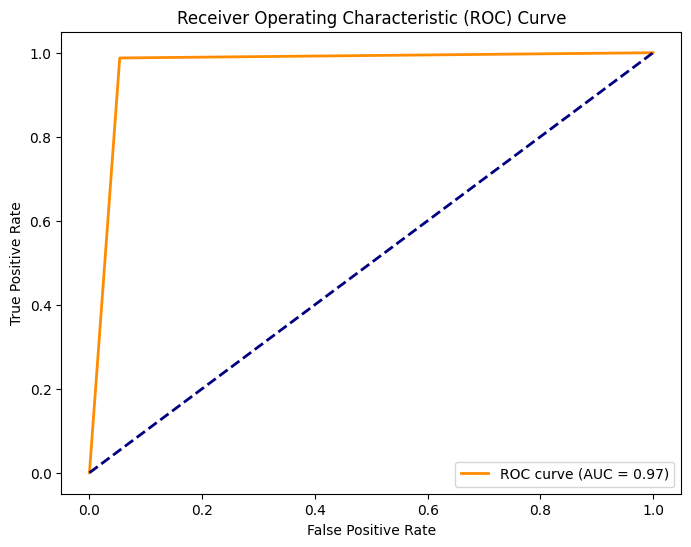

In [13]:
# Calculate AUC
auc_score = roc_auc_score(y_test, binary_predictions)
# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, binary_predictions)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

picturePath = "{}Model_Evaluation_ROC_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, method, dataSetName, numberOfEpochs)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')

plt.show()
plt.close()




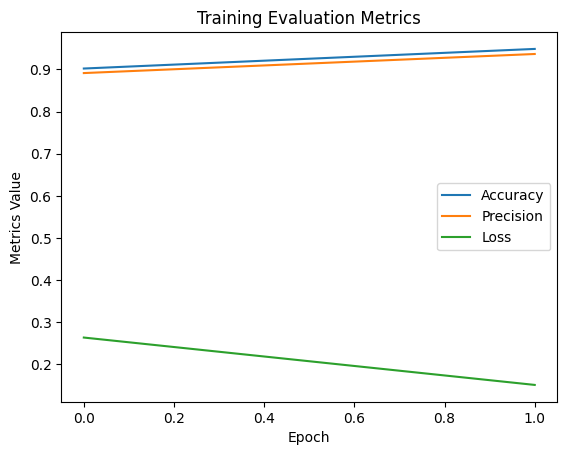

In [14]:
import matplotlib.pyplot as plt

# Sample data for illustration purposes
history = {'accuracy': [0.6, 0.7, 0.8, 0.9],
           'loss': [0.5, 0.4, 0.3, 0.2],
           'precision': [0.7, 0.8, 0.85, 0.9]}

# Plot accuracy
plt.plot(model_history.history['accuracy'], label='Accuracy')

# Plot precision
plt.plot(model_history.history['precision'], label='Precision' )

# Plot loss
plt.plot(model_history.history['loss'], label='Loss')

# Set plot labels and title
plt.title('Training Evaluation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics Value')

# Add legend
plt.legend()

picturePath = "{}Model_Training_Evaluation_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, method, dataSetName, numberOfEpochs)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')

plt.show()
plt.close()


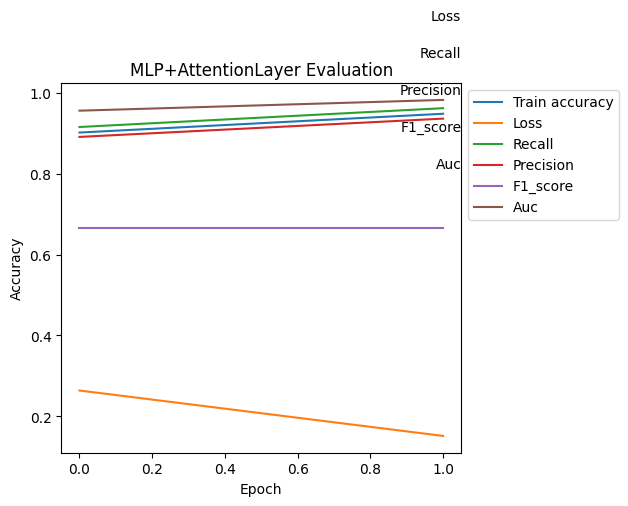

In [15]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(model_history.history['accuracy'], label='Train accuracy')
#plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.title('MLP+AttentionLayer Evaluation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Add additional metrics and adjust label positions
metrics = ['loss', 'recall', 'precision', 'f1_score', 'auc']
for i, metric in enumerate(metrics):
    plt.plot(model_history.history[metric], label=metric.capitalize())
    y_offset = (i - 2) * 0.1  # Adjust based on desired spacing
    plt.text(1, 1 - y_offset, metric.capitalize(), verticalalignment='top', ha='right', transform=plt.gca().transAxes)

# Adjust layout and legend
plt.subplots_adjust(right=0.75)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save and clear plot
picturePath = "{}Result_ModelEvaluation_{}_{}.png".format(dataSetResultDirectory, "MLP+AttentionLayer Model", dataSetName)
plt.savefig(picturePath, dpi=300, bbox_inches='tight')
plt.show()
plt.close()


In [18]:
percentage = 0.30
numberOfFeatures = int(len(features) *percentage)
print("Total Features: {} -> Selected for SHAP:: {}".format(len(features), numberOfFeatures))
featuresForShap = X_train.columns #features[0:numberOfFeatures]
#print(" Features Name: {}".format(  featuresForShap))

numberOftest = int(len(X_test_scaler) * percentage)
print("Total Test: {} -> Selected for SHAP:: {}".format(len(X_test_scaler), numberOftest))
testForShap = X_test_scaler[0:len(featuresForShap)]
testForShap = X_test_scaler[0:numberOftest]
#print(" testForShap Name: {}".format(  testForShap))


# computing SHAP values for bar, beeswarm, and waterfall plot 
background = shap.maskers.Independent(data=testForShap, max_samples=1000)    #read ‘Shap Explainers’

shap_explainer = shap.Explainer(model, feature_names=featuresForShap, masker=shap.maskers.Independent(data=testForShap)) 
#shap_explainer = shap.Explainer(model,  feature_names=featuresForShap,  masker=background) 
#shap_explainer = shap.Explainer(model) 



Total Features: 56914 -> Selected for SHAP:: 17074
Total Test: 14228 -> Selected for SHAP:: 4268


PermutationExplainer explainer: 4269it [50:59,  1.39it/s]                          


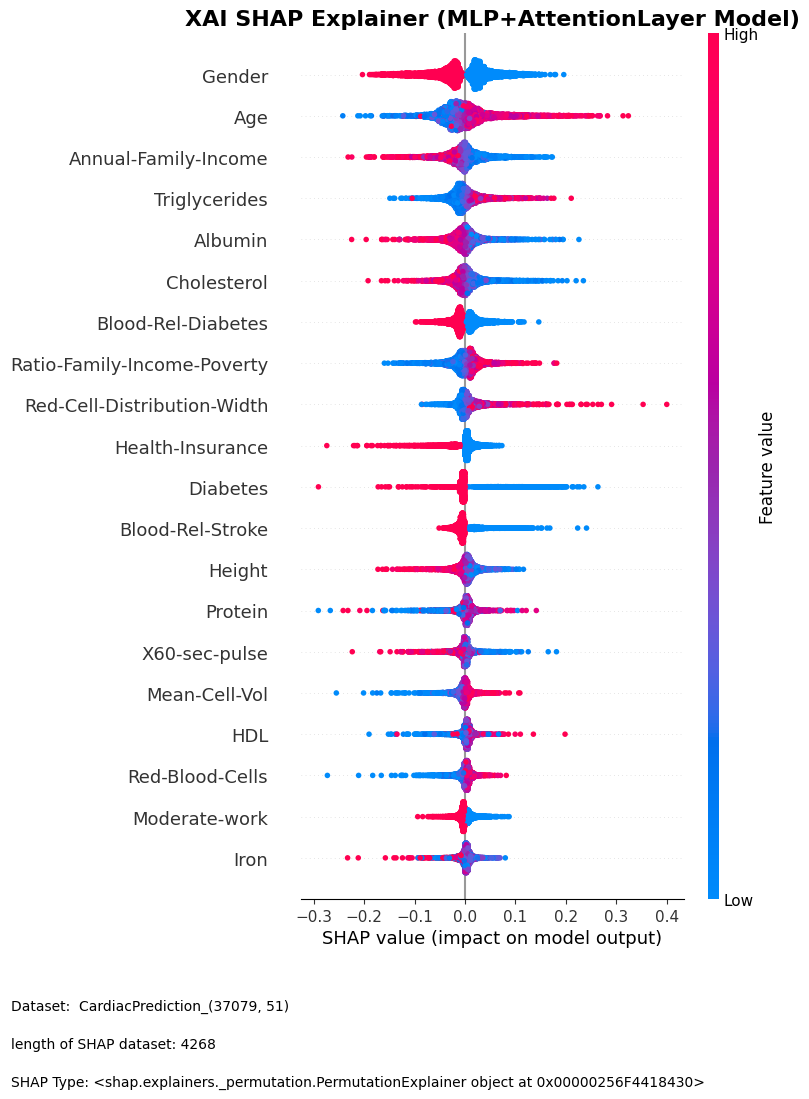

In [19]:
shap_values = shap_explainer.shap_values(testForShap)  

def makeSHAPreport(method, model):
    shap.summary_plot(shap_values, testForShap, featuresForShap, show=False)
    ax = mplot.gca() 
    ax.set_title("XAI SHAP Explainer ({} Model)".format(method) ,fontsize=16, fontweight='bold')     

    dataSetString = "Dataset:  {}".format(dataSetName)
    testingDatasetString ="length of SHAP dataset: {}".format(len(testForShap))
    shapTypeString ="SHAP Type: {}".format(repr(shap_explainer)) 
    ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
    ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   
    ax.figure.text(0.020, -0.13,  shapTypeString, horizontalalignment='left', wrap=False )   

    picturePath = "{}XAI_SHAP_Explainer_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    #mplot.savefig(picturePath,  dpi=300) 
    mplot.show()
    #os.startfile(picturePath)
    mplot.close()


makeSHAPreport("MLP+AttentionLayer", model)

In [20]:
feature_names = X.columns.tolist()
# Calculate average SHAP values across all instances
avg_shap_values = np.mean(shap_values, axis=0)

# Calculate the absolute mean SHAP values for each feature
abs_mean_shap_values = np.abs(shap_values).mean(axis=0)
# Get the indices of the top 15 features
top_15_feature_indices = np.argsort(abs_mean_shap_values)[-15:]
avg_shap_values = np.mean(shap_values, axis=0)
# Get indices that would sort the average SHAP values
sorted_indices = np.argsort(avg_shap_values)
# Arrange feature names and average SHAP values in ascending order
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_avg_shap_values = avg_shap_values[sorted_indices]
# Print sorted feature names and average SHAP values
print("Sorted Average SHAP values:")
for i in range(len(sorted_feature_names)):
    print(f"{sorted_feature_names[i]}: {sorted_avg_shap_values[i]*100.0}")
 
# Select the top 10 features
top_10_feature_indices = sorted_indices[-15:]
top_10_feature_names = [feature_names[i] for i in top_10_feature_indices]
top_10_shap_values = shap_values[:, top_10_feature_indices]
# Create a DataFrame for visualization
df_top_10 = pd.DataFrame(data=top_10_shap_values, columns=top_10_feature_names)
# Plotting with Seaborn's violinplot
plt.figure(figsize=(15, 6))
sns.violinplot(data=df_top_10, inner="quartile", palette="muted") 
plt.title('MLP Model with SHAP (XAI) Violin Plot')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_Violinplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight') 
plt.close()

Sorted Average SHAP values:
Gender: -0.33914002550750333
Mean-Cell-Vol: -0.33221866277252815
Annual-Family-Income: -0.2686605899412881
Body-Mass-Index: -0.15038949582933117
X60-sec-pulse: -0.14972258262392862
Monocyte: -0.143431961806811
Basophils: -0.10982019908967527
Albumin: -0.10570086746697951
Triglycerides: -0.10234035101812555
Health-Insurance: -0.07131600177290844
Red-Blood-Cells: -0.05712074537791808
Diastolic: -0.048390024196922066
AST: -0.044108191294725575
Protein: -0.03616190869676292
Mean-cell-Hemoglobin: -0.03210856653752068
Platelet-count: -0.030101558716652092
LDH: -0.02820237882846426
GGT: -0.024812930084422896
Mean-Cell-Hgb-Conc.: -0.0033176490651778676
Weight: 0.004700420632098646
ALP: 0.016371918140129685
Mean-Platelet-Vol: 0.02027475255464297
SEQN: 0.023932772195481428
Creatinine: 0.03468965569020254
Systolic: 0.03669242312382242
Glycohemoglobin: 0.040878708797803816
Blood-Rel-Stroke: 0.04656185440661593
Bilirubin: 0.05024049603635027
Eosinophils: 0.06195904951820

In [ ]:
# Calculate the absolute mean SHAP values for each feature
abs_mean_shap_values = np.abs(shap_values).mean(axis=0)

# Get the indices of the top 15 features
top_15_feature_indices = np.argsort(abs_mean_shap_values)[-15:]
top_15_feature_names = X_test.columns[top_15_feature_indices]

# Plot the summary plot for the top 15 features
shap.summary_plot(shap_values, X_test, feature_names=top_15_feature_names, show=False)


ax = mplot.gca() 
ax.set_title("XAI SHAP Explainer (Top Features)" ,fontsize=16, fontweight='bold')    
 

picturePath = "{}XAI_SHAP_Explainer_TopFeatures_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
mplot.show()
mplot.close()

In [21]:
# Plot the summary Bar plot for the top 15 features
shap.summary_plot(shap_values, X_test, feature_names=top_15_feature_names, plot_type='bar', show=False)
 
ax = mplot.gca() 
ax.set_title("XAI SHAP Explainer ({} Model)".format(method) ,fontsize=16, fontweight='bold')    
 

picturePath = "{}XAI_SHAP_Explainer_BAR_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
mplot.show()
mplot.close()

# Print or use the te

IndexError: tuple index out of range

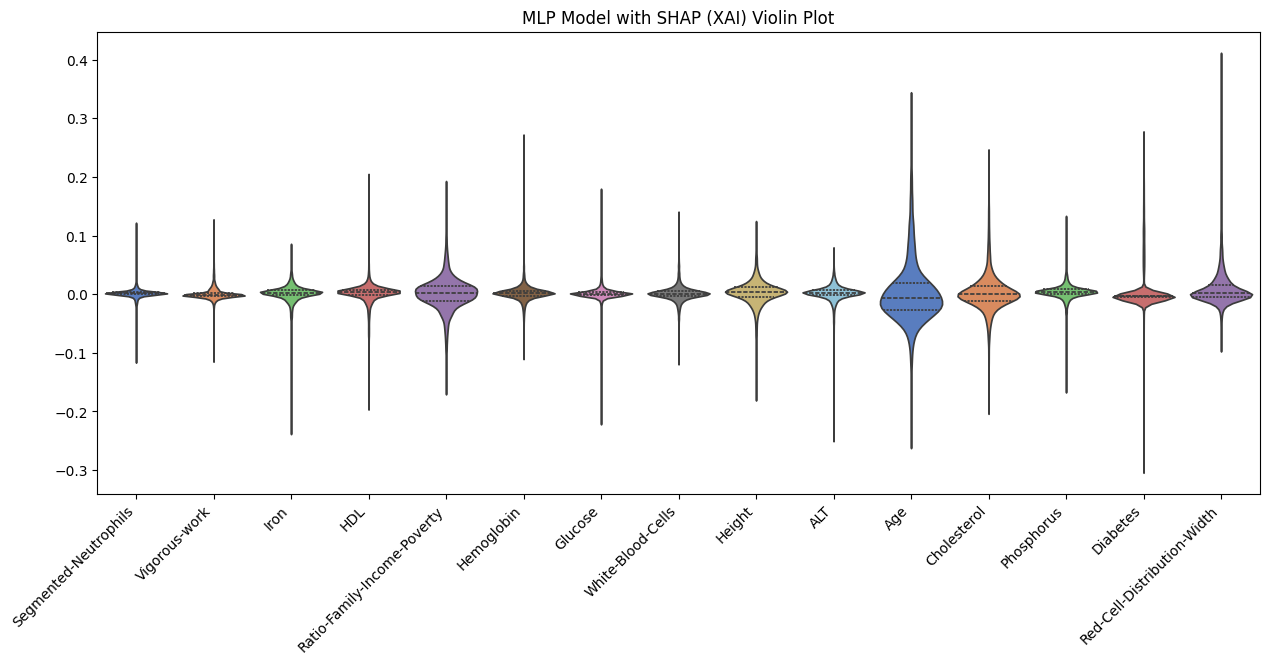

In [22]:
# Arrange feature names and average SHAP values in ascending order
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_avg_shap_values = avg_shap_values[sorted_indices]
# Select the top 10 features
top_10_feature_indices = sorted_indices[-15:]
top_10_feature_names = [feature_names[i] for i in top_10_feature_indices]
top_10_shap_values = shap_values[:, top_10_feature_indices]
# Create a DataFrame for visualization
df_top_10 = pd.DataFrame(data=top_10_shap_values, columns=top_10_feature_names)
# Plotting with Seaborn's violinplot
plt.figure(figsize=(15, 6))
sns.violinplot(data=df_top_10, inner="quartile", palette="muted") 
plt.title('MLP Model with SHAP (XAI) Violin Plot')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_Violinplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

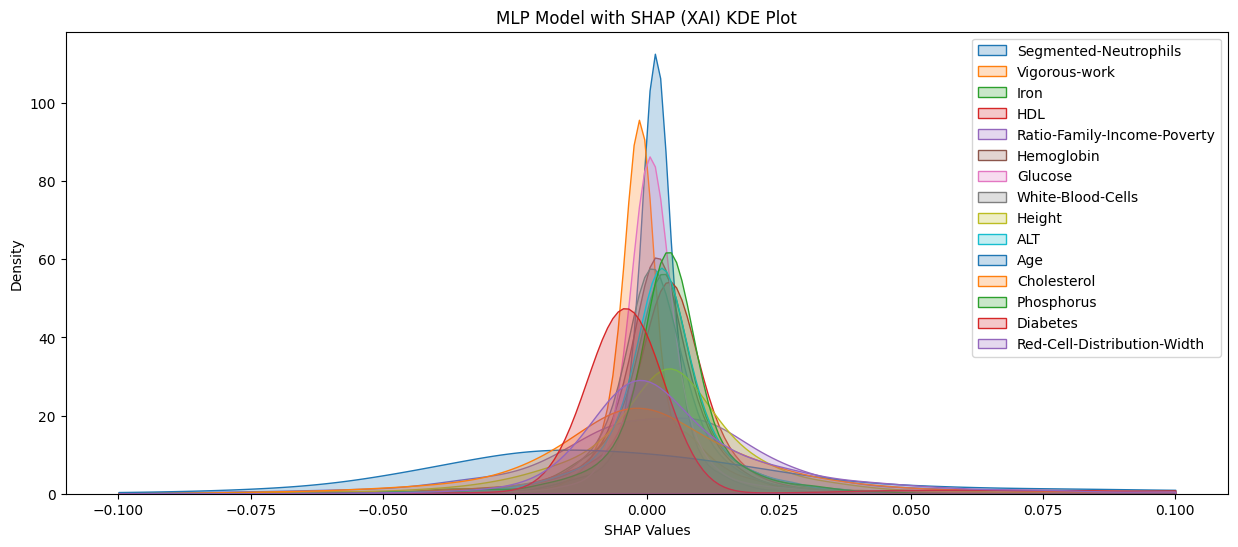

In [23]:
# Set the x-axis range
x_axis_range = (-0.10, 0.10)  # Adjust the range as needed
# Plotting with Seaborn's kdeplot
plt.figure(figsize=(15, 6))
for feature in top_10_feature_names:
    sns.kdeplot(data=df_top_10[feature], label=feature, common_norm=False, common_grid=True, fill=True, clip=x_axis_range)
 
plt.title('MLP Model with SHAP (XAI) KDE Plot')
plt.xlabel('SHAP Values')
plt.ylabel('Density')
plt.legend()
picturePath = "{}XAI_SHAP_Explainer_SNS_KDEplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

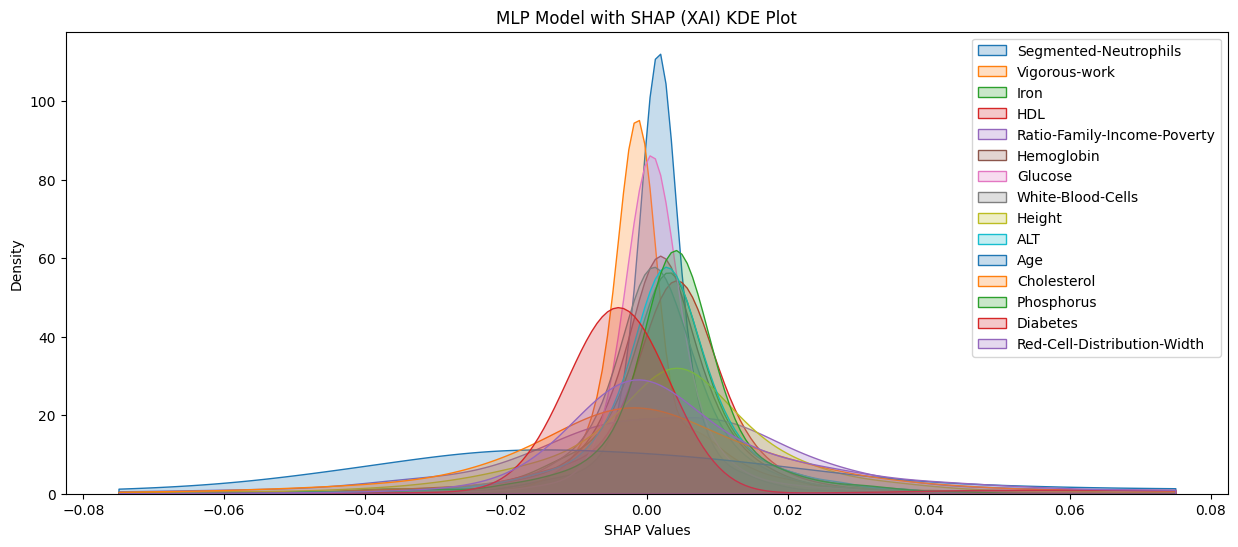

In [ ]:
# Set the x-axis range
x_axis_range = (-0.075, 0.075)  # Adjust the range as needed
# Plotting with Seaborn's kdeplot
plt.figure(figsize=(15, 6))
for feature in top_10_feature_names:
    sns.kdeplot(data=df_top_10[feature], label=feature, common_norm=False, common_grid=True, fill=True, clip=x_axis_range)
 
plt.title('MLP Model with SHAP (XAI) KDE Plot')
plt.xlabel('SHAP Values')
plt.ylabel('Density')
plt.legend()
picturePath = "{}XAI_SHAP_Explainer_SNS_KDEplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# Plotting with Seaborn's swarmplot (Beeswarm plot)
'''
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df_top_10, palette="muted", size=3) 
plt.title('MLP Model with SHAP (XAI) Beeswarm Plot')
plt.ylabel('SHAP Values')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_Beeswarmplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()
'''


# Plotting with Seaborn's stripplot instead of swarmplot
plt.figure(figsize=(12, 6))
sns.stripplot(data=df_top_10, palette="muted", size=3, jitter=True) 
plt.title('MLP Model with SHAP (XAI) Stripplot')
plt.ylabel('SHAP Values')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_Stripplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Shape of X_test_scaler: (14228, 50)
Shape of testForShap: (4268, 50)
Shape of shap_values: (4268, 50)


IndexError: index 34 is out of bounds for axis 0 with size 15

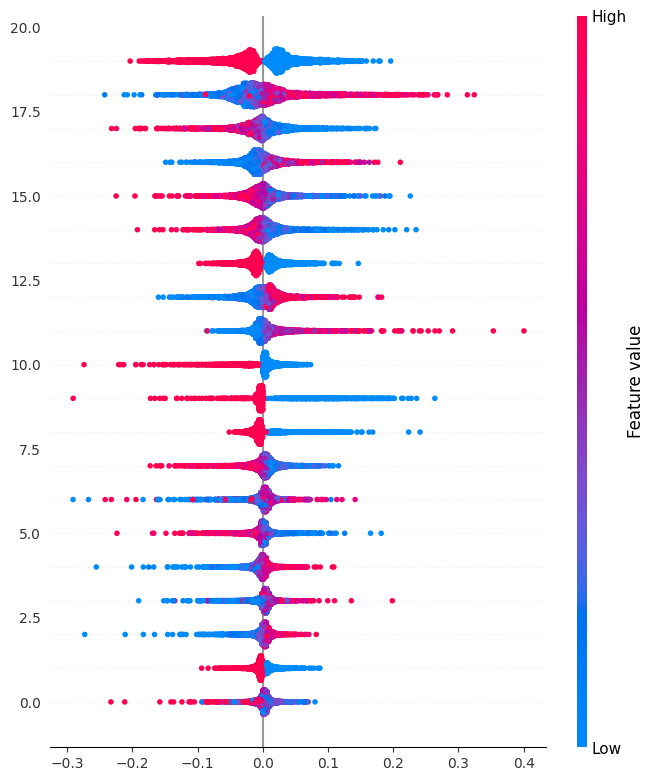

In [29]:
# Calculate the absolute mean SHAP values for each feature
abs_mean_shap_values = np.abs(shap_values).mean(axis=0)

# Get the indices of the top 15 features
top_15_feature_indices = np.argsort(abs_mean_shap_values)[-15:]
top_15_feature_names = X_test.columns[top_15_feature_indices]

 
print("Shape of testForShap:", testForShap.shape)
print("Shape of shap_values:", shap_values.shape)


# Plot the summary plot for the top 15 features
shap.summary_plot(shap_values, testForShap, feature_names=top_15_feature_names, show=False) 
plt.title('MLP Model with SHAP Summary (XAI)') 

picturePath = "{}XAI_SHAP_Explainer_SNS_SummaryChart_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Shape of testForShap: (4268, 50)
Shape of shap_values: (4268, 50)
Top 15 Feature Names: Index(['X60-sec-pulse', 'Protein', 'Height', 'Blood-Rel-Stroke', 'Diabetes',
       'Health-Insurance', 'Red-Cell-Distribution-Width',
       'Ratio-Family-Income-Poverty', 'Blood-Rel-Diabetes', 'Cholesterol',
       'Albumin', 'Triglycerides', 'Annual-Family-Income', 'Age', 'Gender'],
      dtype='object')
Filtered Feature Names: ['X60-sec-pulse', 'Protein', 'Height', 'Blood-Rel-Stroke', 'Diabetes', 'Health-Insurance', 'Red-Cell-Distribution-Width', 'Ratio-Family-Income-Poverty', 'Blood-Rel-Diabetes', 'Cholesterol', 'Albumin', 'Triglycerides', 'Annual-Family-Income', 'Age', 'Gender']


IndexError: list index out of range

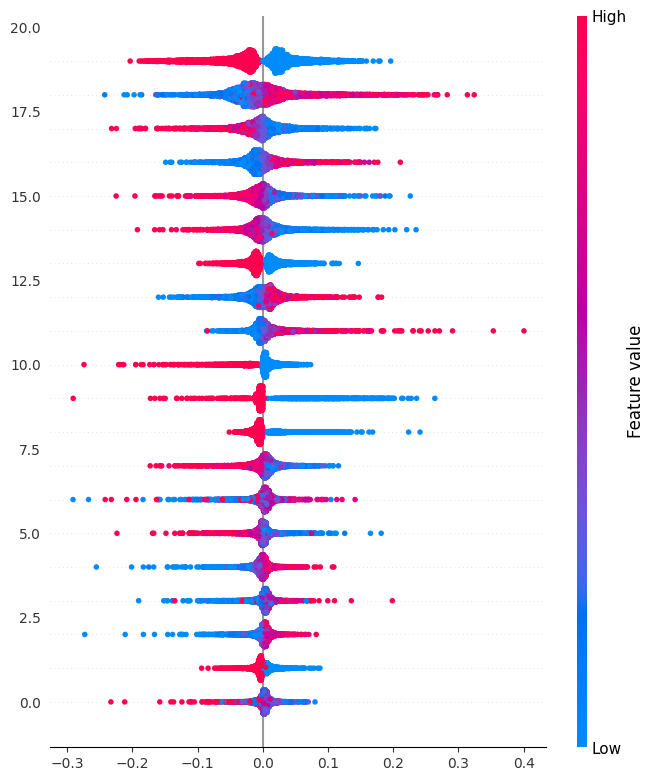

In [33]:
# Calculate the absolute mean SHAP values for each feature
abs_mean_shap_values = np.abs(shap_values).mean(axis=0)

# Get the indices of the top 15 features
top_15_feature_indices = np.argsort(abs_mean_shap_values)[-15:]
top_15_feature_names = X_test.columns[top_15_feature_indices]

# Print the shapes for debugging
print("Shape of testForShap:", testForShap.shape)
print("Shape of shap_values:", shap_values.shape)

# Ensure that the number of samples match
assert testForShap.shape[0] == shap_values.shape[0], "Number of samples in testForShap and shap_values do not match!"

# Filter feature names for plotting
filtered_feature_names = [feature for feature in top_15_feature_names if feature in X_test.columns]

# Debug information
print("Top 15 Feature Names:", top_15_feature_names)
print("Filtered Feature Names:", filtered_feature_names)

# Plot the summary plot for all instances and the top 15 features
shap.summary_plot(shap_values, testForShap, feature_names=filtered_feature_names, show=False)
plt.title('MLP Model with SHAP Summary (XAI)')

picturePath = "{}XAI_SHAP_Explainer_SNS_SummaryChart_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath, dpi=300, bbox_inches='tight')
plt.show()
plt.close()


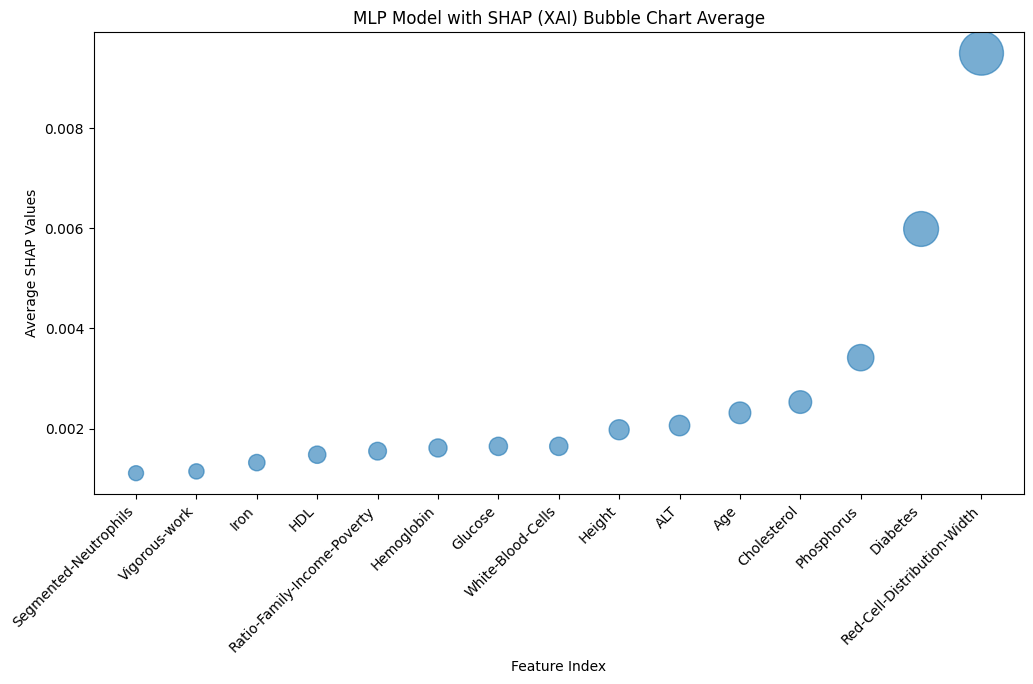

In [34]:
# Select the top 10 features
top_10_feature_indices = sorted_indices[-15:]
top_10_feature_names = [feature_names[i] for i in top_10_feature_indices]
top_10_avg_shap_values = avg_shap_values[top_10_feature_indices]

# Calculate the scale for bubble size based on the average values compared to others
size_scale = np.abs(top_10_avg_shap_values) / np.max(np.abs(top_10_avg_shap_values))

# Create a DataFrame for visualization
df_top_10_avg_shap = pd.DataFrame({'Feature': top_10_feature_names, 'Average SHAP Value': top_10_avg_shap_values})

# Plotting a Bubble Chart for top 10 average SHAP values
plt.figure(figsize=(12, 6))

size = size_scale * 1000  # Adjust the scale as needed
plt.scatter(x=range(len(df_top_10_avg_shap)), y=df_top_10_avg_shap['Average SHAP Value'], s=size, alpha=0.6)

plt.title('MLP Model with SHAP (XAI) Bubble Chart Average')
plt.xlabel('Feature Index')
plt.ylabel('Average SHAP Values')
plt.xticks(range(len(df_top_10_avg_shap)), df_top_10_avg_shap['Feature'], rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_BubbleChartAverage_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
import plotly.graph_objects as go
# Plotting a Sankey Diagram for the selected instance

# Assuming your features are in a pandas DataFrame, you can access feature names
feature_names = X.columns.tolist()
# Aggregate SHAP values across instances
aggregated_shap_values = np.sum(shap_values, axis=0)
 
# Define custom colors for nodes and links
node_colors = ['rgba(102, 197, 204, 0.8)' for _ in feature_names] + ['rgba(255, 102, 102, 0.8)']  # Light blue for features, light red for prediction
link_colors = ['rgba(102, 197, 204, 0.5)' for _ in feature_names] * len(shap_values)  # Light blue for links

# Plotting a Sankey Diagram of Energy Flow for aggregated SHAP values
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=feature_names + ['Prediction'],
        color=node_colors
    ),
    link=dict(
        source=[feature_names.index(feature) for feature in feature_names] * len(shap_values),
        target=[len(feature_names)] * len(feature_names) * len(shap_values),
        value=np.tile(aggregated_shap_values, len(shap_values)).tolist() + [np.sum(aggregated_shap_values)] * len(shap_values),
        color=link_colors

    )
)])


fig.update_layout(title_text="Sankey Diagram of Aggregated SHAP Values")

picturePath = "{}XAI_SHAP_Explainer_Sankey_Diagram_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
#fig.write_image(picturePath)
fig.show() 

In [ ]:
# Plotting a boxplot for the top 10 features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_10, orient='h', palette='Set2')


plt.title('MLP Model with SHAP (XAI) Box Plot')
plt.xlabel('SHAP Values')
plt.ylabel('Features')

picturePath = "{}XAI_SHAP_Explainer_SNS_BoxPlot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# Plotting an area chart for all SHAP values of the top 10 features
plt.figure(figsize=(15, 10))
for feature in top_10_feature_names:
    sns.lineplot(x=range(df_top_10.shape[0]), y=df_top_10[feature], label=feature)
 
plt.title('MLP Model with SHAP (XAI) Area Chart')

plt.xlabel('Instances')
plt.ylabel('SHAP Values')
plt.legend(loc='upper right')

picturePath = "{}XAI_SHAP_Explainer_SNS_AreaChart_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming your features are in a pandas DataFrame, you can access feature names
feature_names = X.columns.tolist()
# Get the top 3 features based on their absolute average SHAP values
top_3_feature_indices = np.argsort(np.abs(shap_values.mean(0)))[-3:]
top_3_feature_names = [feature_names[i] for i in top_3_feature_indices]
# Extract SHAP values for the top 3 features
shap_values_top_3 = shap_values[:, top_3_feature_indices]
# Create a DataFrame for visualization
df_top_3 = pd.DataFrame(data=shap_values_top_3, columns=top_3_feature_names)

# Create a 3D bubble plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
 

# Scatter plot with adjusted size and color
scatter = ax.scatter(df_top_3[top_3_feature_names[0]], df_top_3[top_3_feature_names[1]], df_top_3[top_3_feature_names[2]],
                     s=800 * np.abs(df_top_3.mean(axis=1)),  # Adjust the size
                     c=df_top_3.mean(axis=1), cmap='viridis', alpha=0.9, edgecolors='w', linewidth=0.8)  # Adjust the color

# Add labels and title
ax.set_xlabel(top_3_feature_names[0])
ax.set_ylabel(top_3_feature_names[1])
ax.set_zlabel(top_3_feature_names[2])
ax.set_title('3D Bubble Plot of Top 3 Features')
plt.title('MLP Model with SHAP (XAI) 3D Bubble Plot')


# Add colorbar
colorbar = plt.colorbar(scatter, ax=ax, label='Average SHAP Value')

picturePath = "{}XAI_SHAP_Explainer_SNS_BubblePlot_3D_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Concatenate


# Assuming 'features' is your input data
X_train_forLime, X_test_forLime, y_train_forLime, y_test_forLime = train_test_split(features, target, test_size=0.2, random_state=42)
 
# Wrap the TensorFlow model for LIME
class LimeModelWrapper:
    def __init__(self, model, feature_names):
        self.model = model
        self.feature_names = feature_names

    '''
    def predict_proba(self, instances):
        # Ensure the model outputs probabilities
        raw_predictions = self.model.predict(instances)
        probabilities = tf.nn.softmax(raw_predictions, axis=-1).numpy()
        return probabilities.tolist() 
    '''
    def predict_proba(self, instances):
        # Ensure the model outputs probabilities
        instances = np.array(instances)  # Convert to NumPy array
        #if len(instances.shape) == 1: instances = instances.reshape(1, -1)  # Reshape to 2D if it's 1D
        raw_predictions = self.model.predict(instances)
        probabilities = tf.nn.softmax(raw_predictions, axis=-1).numpy()
        return probabilities   # Convert the array to a list



lime_model = LimeModelWrapper(model, featuresForShap)


#print("featuresForShap: {}".format(featuresForShap))

# Instantiate LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer( np.array(X_train_forLime), mode='classification', feature_names=featuresForShap, verbose=True, class_names=["Healthy", "Heart Patient"] ) 

# Generate explanations for each testing instance
instance = X_test_forLime
num_instances = 50 # int(len(X_test_forLime) / 4)
print("num_instances: {}".format(num_instances))

explanations = [] 


for i in range(num_instances):
    instan = instance[i]
    #print(instan.dtype)
    #print(instan.shape)
    #print("Instance {}: {}".format(i, instan))  # Add this line to print the instance
    prediction = lime_model.predict_proba([instan])
    print("Model Prediction for Instance {}: {}".format(i, prediction))  # Add this line to print the model prediction
    explanation = explainer.explain_instance(
        instan,
        lime_model.predict_proba,
        num_features=len(featuresForShap),
        top_labels=1,
        labels=[1],
        num_samples=1000  # Adjust the number of samples here
    )
    explanations.append(explanation)
    print("Explanation Map for Instance {}: {}".format(i, explanation.as_map())) 




In [ ]:
feature_importances = [exp.as_map()[1] for exp in explanations if 1 in exp.as_map()]
print("Feature Importances: {}".format(feature_importances))

# Check if the feature_importances list is not empty
if feature_importances: 
    feature_importances = feature_importances[0]
else: 
    feature_importances = [(i, 0.0) for i in range(len(featuresForShap))]

averageF = [singleFeature[1] for singleFeature in feature_importances]


print("\n\nfeature_list:{}".format(featuresForShap))
print("averageF:{} \n\n".format(averageF))


# Plot the feature importances
fig, ax = plt.subplots()
ax.barh(featuresForShap, averageF)
ax.set_ylabel('Feature List')
ax.set_xlabel('Average Importance')
ax.set_title("XAI LIME ({} Model)".format(method), fontsize=16, fontweight='bold')

# Additional information
dataSetString = "Dataset:  {}".format(dataSetName)
testingDatasetString = "Length of Testing Set: {}".format(len(X_test_forLime))
explainerModelString = "LIME Explainer Model: {}".format(explainer.mode)
ax.figure.text(0.020, -0.05, dataSetString, horizontalalignment='left', wrap=False)
ax.figure.text(0.020, -0.09, testingDatasetString, horizontalalignment='left', wrap=False)
ax.figure.text(0.020, -0.13, explainerModelString, horizontalalignment='left', wrap=False)

# Save and show the plot
picturePath = "{}XAI_LIME_2_{}_{}.png".format(dataSetResultDirectory, method, dataSetName)
plt.savefig(picturePath, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
import datetime
currentDateTime = datetime.datetime.now() 
currentDateTime = currentDateTime.strftime("%Y%m%d %H%M") 
modelPath = "{}model02_trained_{}_{}_{}percent.model".format(dataSetResultDirectory, dataSetName, currentDateTime, accuracy)
print(modelPath)
model2.save(modelPath)